In [69]:
!pip install pillow


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

## Zadania

### Zadanie 1

Bazując na powyższych przykładach wykresu radarowego napisz funkcję, która będzie w stanie wyświetlić podobny wykres dla danych ze zbioru FIFA22_official_data.csv (podfolder **data**). Założenia:

* funkcja przyjmuje jako wektor pandas DataFrame, w którym pierwsza kolumna to nazwa piłkarza a kolejne kolumny to dowolny podzbiór cech piłkarskich tego zawodnika (od Crossing do GKReflexes),
* funkcja i wykres powinny działać dla zmiennej liczby cech oraz dla zmiennej liczby piłkarzy,
* ustaw stały zakres wartości cech w przedziale [0, 100],
* etykiety osi na wykresie to etykiety kolumn poza nazwą piłkarza,
* każdy piłkarz reprezentowany jest przez inny kolor,
* legenda zawiera również nazwisko piłkarza.

In [16]:
df = pd.read_csv('data/FIFA22_official_data.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [48]:
df_filtered = df.loc[:5,['Name', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve']]

In [41]:
def plot_fifa_radar(df):
    players = df.iloc[:, 0].values
    features = df.columns[1:].tolist()
    data = df.iloc[:, 1:].values

    num_vars = len(features)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    colors = plt.cm.tab10.colors

    for idx, (player, stats) in enumerate(zip(players, data)):
        stats = stats.tolist()
        stats += stats[:1]
        angle_stats = list(zip(angles, stats))
        angles2, stats2 = zip(*angle_stats)

        color = colors[idx % len(colors)]
        ax.fill(angles2, stats2, color=color, alpha=0.25, label=player)
        ax.plot(angles2, stats2, color=color, linewidth=2)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_thetagrids(np.degrees(angles[:-1]), features)

    ax.set_ylim(0, 100)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title('Porównanie piłkarzy FIFA 22', size=16)
    plt.show()


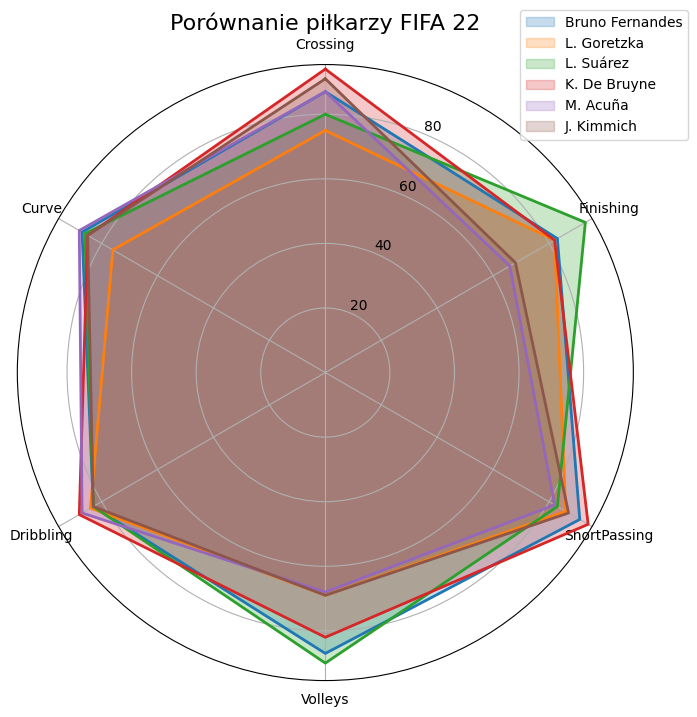

In [47]:
plot_fifa_radar(df_filtered)

### Zadanie 2

Korzystając ze zbioru danych [pkn.txt](./data/pkn.txt), przygotuj skrypt, który będzie wyświetlał animację wykresu odzwierciedlającą cenę zamknięcia (kolumna `CLOSE`) tego waloru. Na osi y powinna znajdować się cena a na osi x kolejny odczyt tej ceny. Przy pierwszym wyświetleniu wykresu pobierz pierwsze 20 wartości, a następnie przy każdej animacji agreguj kolejny odczyt. W miarę możliwości ustaw takie parametry wykresu, aby linia wykresu nie znajdowała się bezpośrednio przy górnej lub prawej krawędzi płótna.
Aktualizuj również na osi x daty odczytu wartości waloru w trakcie postępu animacji.

In [72]:
pkn = pd.read_csv('data/pkn.txt', sep=',')
pkn.columns = pkn.columns.str.strip('<>')
pkn['DATE'] = pd.to_datetime(pkn['DATE'], format='%Y%m%d')
pkn

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT
0,PKN,D,1999-11-26,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,1999-11-29,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,1999-11-30,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,1999-12-01,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,1999-12-02,0,15.818,16.297,15.745,15.954,3304014,0
...,...,...,...,...,...,...,...,...,...,...
5578,PKN,D,2022-03-10,0,74.220,75.420,73.400,74.660,1292634,0
5579,PKN,D,2022-03-11,0,74.660,77.800,74.200,77.600,1369221,0
5580,PKN,D,2022-03-14,0,77.020,77.420,73.800,73.800,1759899,0
5581,PKN,D,2022-03-15,0,74.200,75.740,73.400,75.000,1308018,0


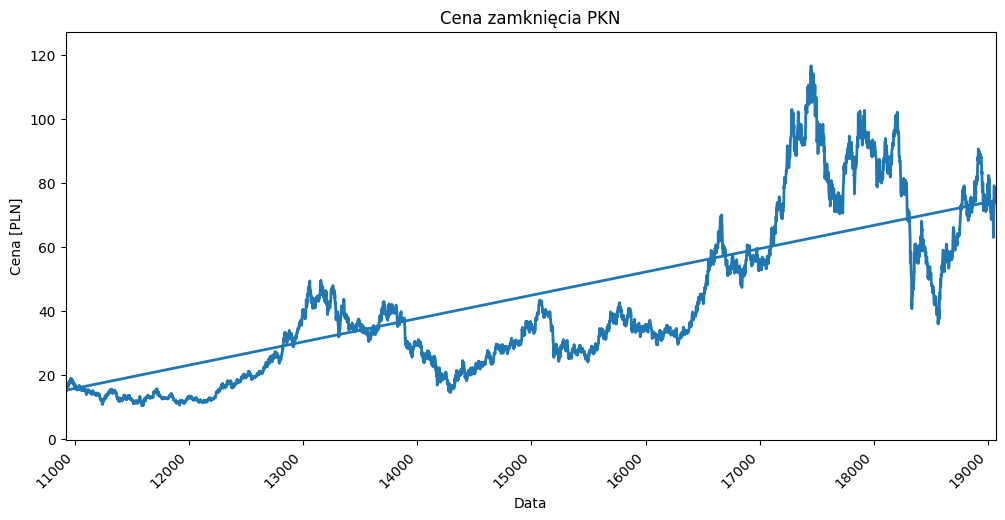

In [78]:
pkn['DATE'] = pd.to_datetime(pkn['DATE'], format='%Y%m%d')

dates = pkn['DATE']
prices = pkn['CLOSE']

x_data = []
y_data = []

fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], '-', lw=2)


ax.margins(x=0.05, y=0.1)
ax.set_title("Cena zamknięcia PKN")
ax.set_xlabel("Data")
ax.set_ylabel("Cena [PLN]")
fig.autofmt_xdate(rotation=45)

def update(frame):
    x_data.append(dates.iloc[frame])
    y_data.append(prices.iloc[frame])
    line.set_data(x_data, y_data)

    ax.relim()
    ax.autoscale_view()

    if len(x_data) > 1:
        ax.set_xlim(min(x_data), max(x_data))

    return line,

ani = animation.FuncAnimation(
    fig, update,
    frames=range(20, len(pkn)),
    init_func=lambda: [update(i) for i in range(20)],
    interval=200,
    blit=False,
    repeat=False
)

writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

## To see the animation please visit Google drive:
https://drive.google.com/file/d/1DcYG6fAi42xnGnhe745r_AqaRWeovme3/view?usp=sharing

### Zadanie 3

Wykorzystując dane [pkn.txt](./data/pkn.txt) wyrysuj wykres liniowy dla ceny zamknięcia i dodaj do wykresu wskaźniki jak w przykładzie z adnotacjami (przykład 2), które wskażą wartość najmniejszą oraz największą.

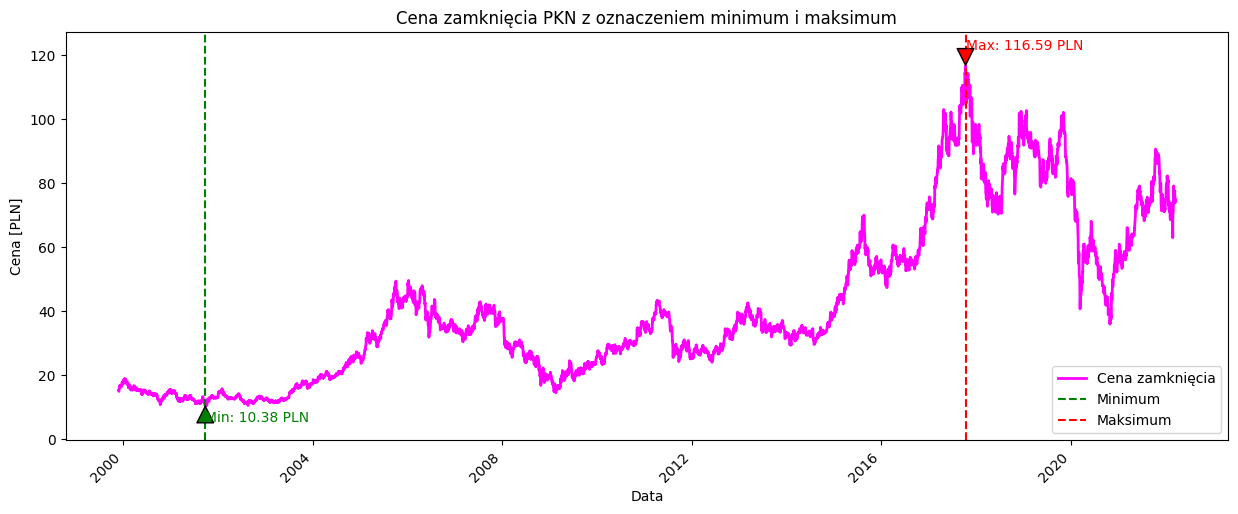

In [83]:
min_idx = prices.idxmin()
max_idx = prices.idxmax()

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(dates, prices, label="Cena zamknięcia", lw=2, color="magenta")

ax.axvline(dates[min_idx], color='g', linestyle='--', label='Minimum')
ax.axvline(dates[max_idx], color='r', linestyle='--', label='Maksimum')

ax.annotate(f'Min: {prices[min_idx]:.2f} PLN',
            xy=(dates[min_idx], prices[min_idx]),
            xytext=(dates[min_idx], prices[min_idx] - 5),
            arrowprops=dict(facecolor='green', shrink=0.05),
            fontsize=10, color='green')

ax.annotate(f'Max: {prices[max_idx]:.2f} PLN',
            xy=(dates[max_idx], prices[max_idx]),
            xytext=(dates[max_idx], prices[max_idx] + 5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=10, color='red')

ax.set_title("Cena zamknięcia PKN z oznaczeniem minimum i maksimum")
ax.set_xlabel("Data")
ax.set_ylabel("Cena [PLN]")
ax.legend()
fig.autofmt_xdate(rotation=45)
ax.margins(x=0.05, y=0.1)

plt.show()

### Zadanie 4

Korzystając z danych [pkn.txt](./data/pkn.txt) pogrupuj dane po roku i miesiącu, znajdź wartość minimalną oraz maksymalną dla kolumny `CLOSE`, a następnie za pomocą przykładu formatowania danych z punktu 4 zaznacz wartość minimalną i maksymalną w tej kolumnie różnymi stylami (odpowiednio funkcje highlight_min oraz highlight_max).

In [92]:
pkn['YEAR'] = pkn['DATE'].dt.year
pkn['MONTH'] = pkn['DATE'].dt.month

grouped = pkn.groupby(['YEAR', 'MONTH']).agg({
    'CLOSE': ['min', 'max']
}).reset_index()

grouped.columns = ['YEAR', 'MONTH', 'CLOSE_MIN', 'CLOSE_MAX']

slice_ = ['CLOSE_MIN', 'CLOSE_MAX']

In [93]:
styled = grouped.style.highlight_min(color='red', subset=slice_) \
                      .highlight_max(color='yellow', subset=slice_) \
                      .format(precision=2,
                              thousands=" ",
                              formatter=lambda x: f"{x:,.2f} zł",
                              subset=slice_)

In [94]:
styled

,YEAR,MONTH,CLOSE_MIN,CLOSE_MAX
0,1999,11,14.92 zł,15.19 zł
1,1999,12,15.67 zł,17.95 zł
2,2000,1,17.26 zł,18.91 zł
3,2000,2,15.33 zł,17.81 zł
4,2000,3,15.27 zł,16.71 zł
5,2000,4,15.12 zł,16.09 zł
6,2000,5,13.96 zł,15.54 zł
7,2000,6,14.23 zł,15.40 zł
8,2000,7,13.89 zł,15.06 zł
9,2000,8,13.48 zł,14.37 zł
